<a href="https://colab.research.google.com/github/tonguip/AI-Project/blob/main/Mask_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Jan 22 02:15:35 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install -q supervision

import supervision as sv
print(sv.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.3 MB/s eta 0:00:00
0.17.1


In [ ]:
!pip install -q ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 701.5/701.5 kB 5.2 MB/s eta 0:00:00


In [ ]:
# https://universe.roboflow.com/
!curl -L "https://app.roboflow.com/ds/m0NTX3UpZX?key=0H47mY0fxL" > roboflow.zip;
!unzip roboflow.zip; rm roboflow.zip

In [ ]:
from IPython.display import Image, display

In [ ]:
dataPath = f"{HOME}/data.yaml"

In [ ]:
from ultralytics import YOLO

# Create a new YOLO model from scratch
model = YOLO('yolov8m.yaml')
model = YOLO('yolov8m.pt')
results = model.train(data=dataPath, epochs=10)

100%|██████████| 49.7M/49.7M [00:00<00:00, 287MB/s]


Ultralytics YOLOv8.1.4 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/data.yaml, epochs=10, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True

100%|██████████| 755k/755k [00:00<00:00, 21.4MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 120MB/s]


AMP: checks passed ✅


train: Scanning /content/train/labels... 1773 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1773/1773 [00:00<00:00, 2045.72it/s]


train: New cache created: /content/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/valid/labels... 170 images, 0 backgrounds, 0 corrupt: 100%|██████████| 170/170 [00:00<00:00, 1350.12it/s]

val: New cache created: /content/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      7.08G      1.503       1.74      1.387         60        640: 100%|██████████| 111/111 [01:00<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.43it/s]

                   all        170        702      0.615      0.464      0.448      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10       7.3G      1.317      1.008      1.231         62        640: 100%|██████████| 111/111 [00:58<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.36it/s]


                   all        170        702      0.793      0.442      0.482      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      7.32G      1.301     0.9227      1.238         72        640: 100%|██████████| 111/111 [00:58<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.17it/s]

                   all        170        702      0.666      0.621      0.634      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      7.27G      1.243     0.8382      1.208         45        640: 100%|██████████| 111/111 [00:58<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.39it/s]

                   all        170        702      0.796      0.606      0.689      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      7.05G      1.233     0.7884      1.198         65        640: 100%|██████████| 111/111 [00:58<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.06it/s]

                   all        170        702       0.73      0.611      0.666      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      7.31G      1.177     0.7321      1.164         44        640: 100%|██████████| 111/111 [00:58<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.35it/s]

                   all        170        702      0.824      0.666      0.735      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      7.32G      1.126     0.6632      1.137         41        640: 100%|██████████| 111/111 [00:58<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.41it/s]

                   all        170        702      0.807      0.687       0.76      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10       7.3G      1.123     0.6219      1.125         93        640: 100%|██████████| 111/111 [00:58<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.15it/s]

                   all        170        702      0.889      0.719      0.819      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      7.57G      1.059     0.5648      1.093         47        640: 100%|██████████| 111/111 [00:58<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.39it/s]

                   all        170        702      0.911      0.747      0.846      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      7.34G      1.026     0.5269      1.078         31        640: 100%|██████████| 111/111 [00:58<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.88it/s]

                   all        170        702      0.856      0.752      0.822       0.56



10 epochs completed in 0.189 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.4 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.28s/it]


                   all        170        702       0.91      0.747      0.845      0.587
 mask_weared_incorrect        170         21          1      0.603      0.739      0.544
             with_mask        170        584      0.944      0.896      0.953      0.658
          without_mask        170         97      0.786      0.742      0.844      0.558
Speed: 1.4ms preprocess, 11.3ms inference, 0.0ms loss, 6.0ms postprocess per image
Results saved to runs/detect/train


In [ ]:
# Evaluate the model's performance on the validation set
results = model.val()

Ultralytics YOLOv8.1.4 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/valid/labels.cache... 170 images, 0 backgrounds, 0 corrupt: 100%|██████████| 170/170 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.22it/s]


                   all        170        702      0.911      0.747      0.846      0.586
 mask_weared_incorrect        170         21          1      0.602       0.74      0.539
             with_mask        170        584      0.945      0.896      0.953       0.66
          without_mask        170         97      0.787      0.742      0.845      0.559
Speed: 0.7ms preprocess, 25.1ms inference, 0.0ms loss, 5.0ms postprocess per image
Results saved to runs/detect/train2


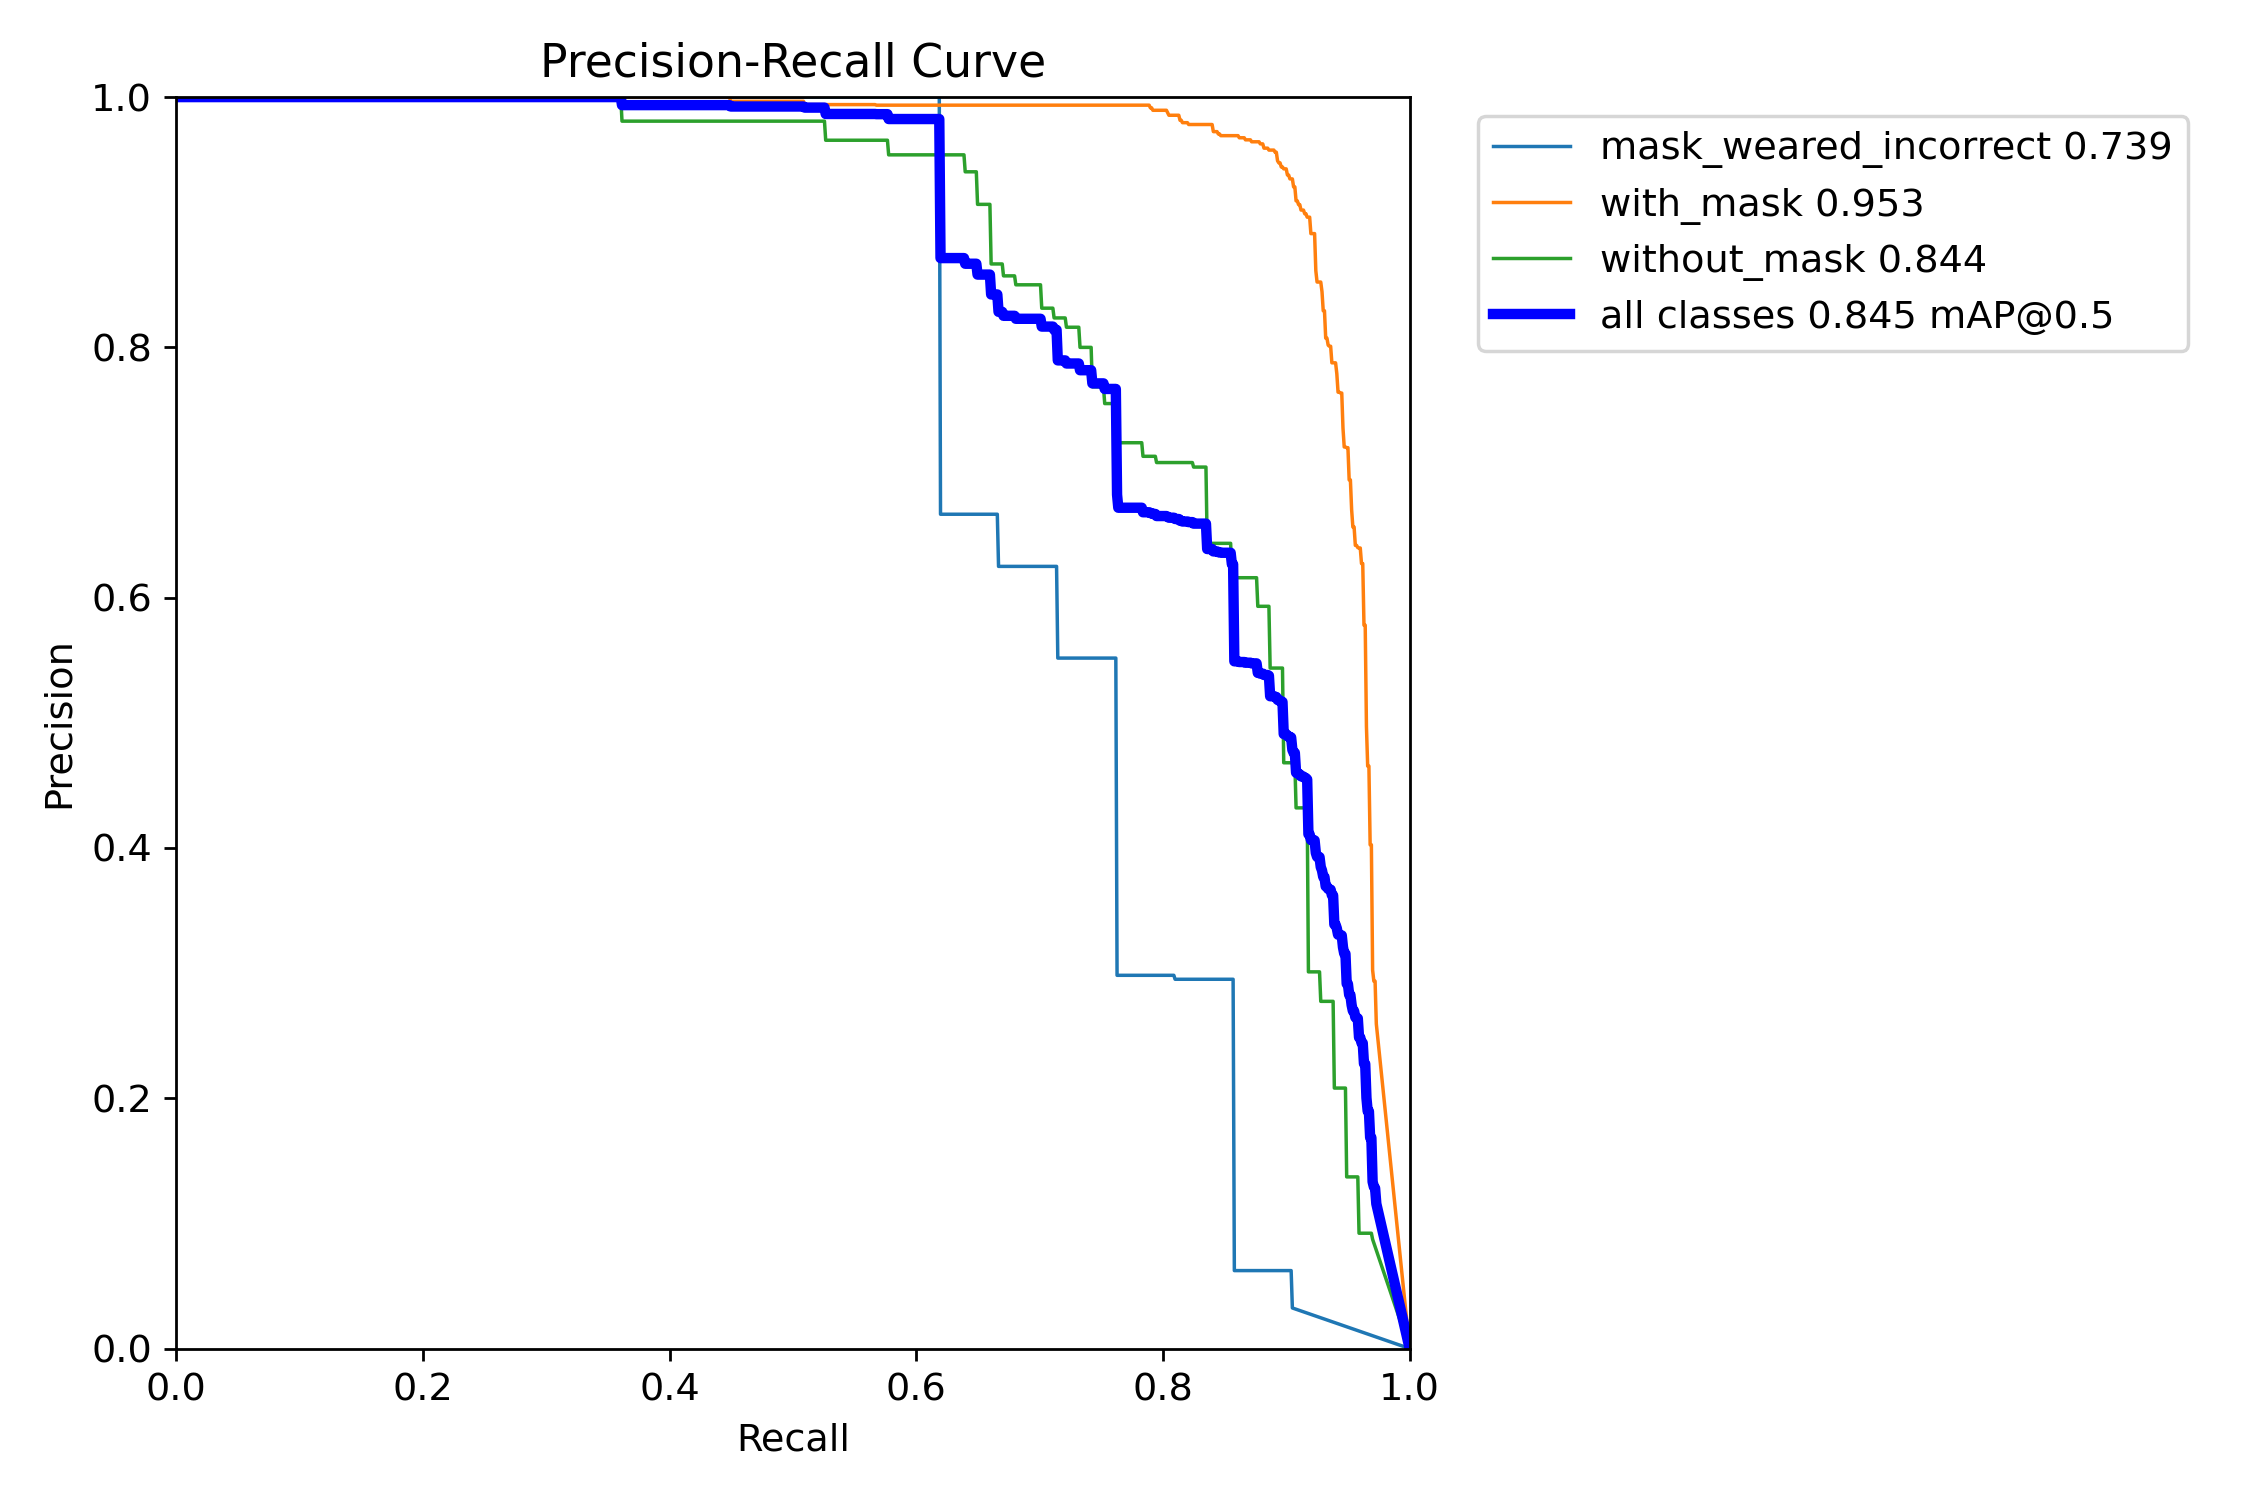

In [ ]:
Image(filename=f"{HOME}/runs/detect/train/PR_curve.png", width=900)

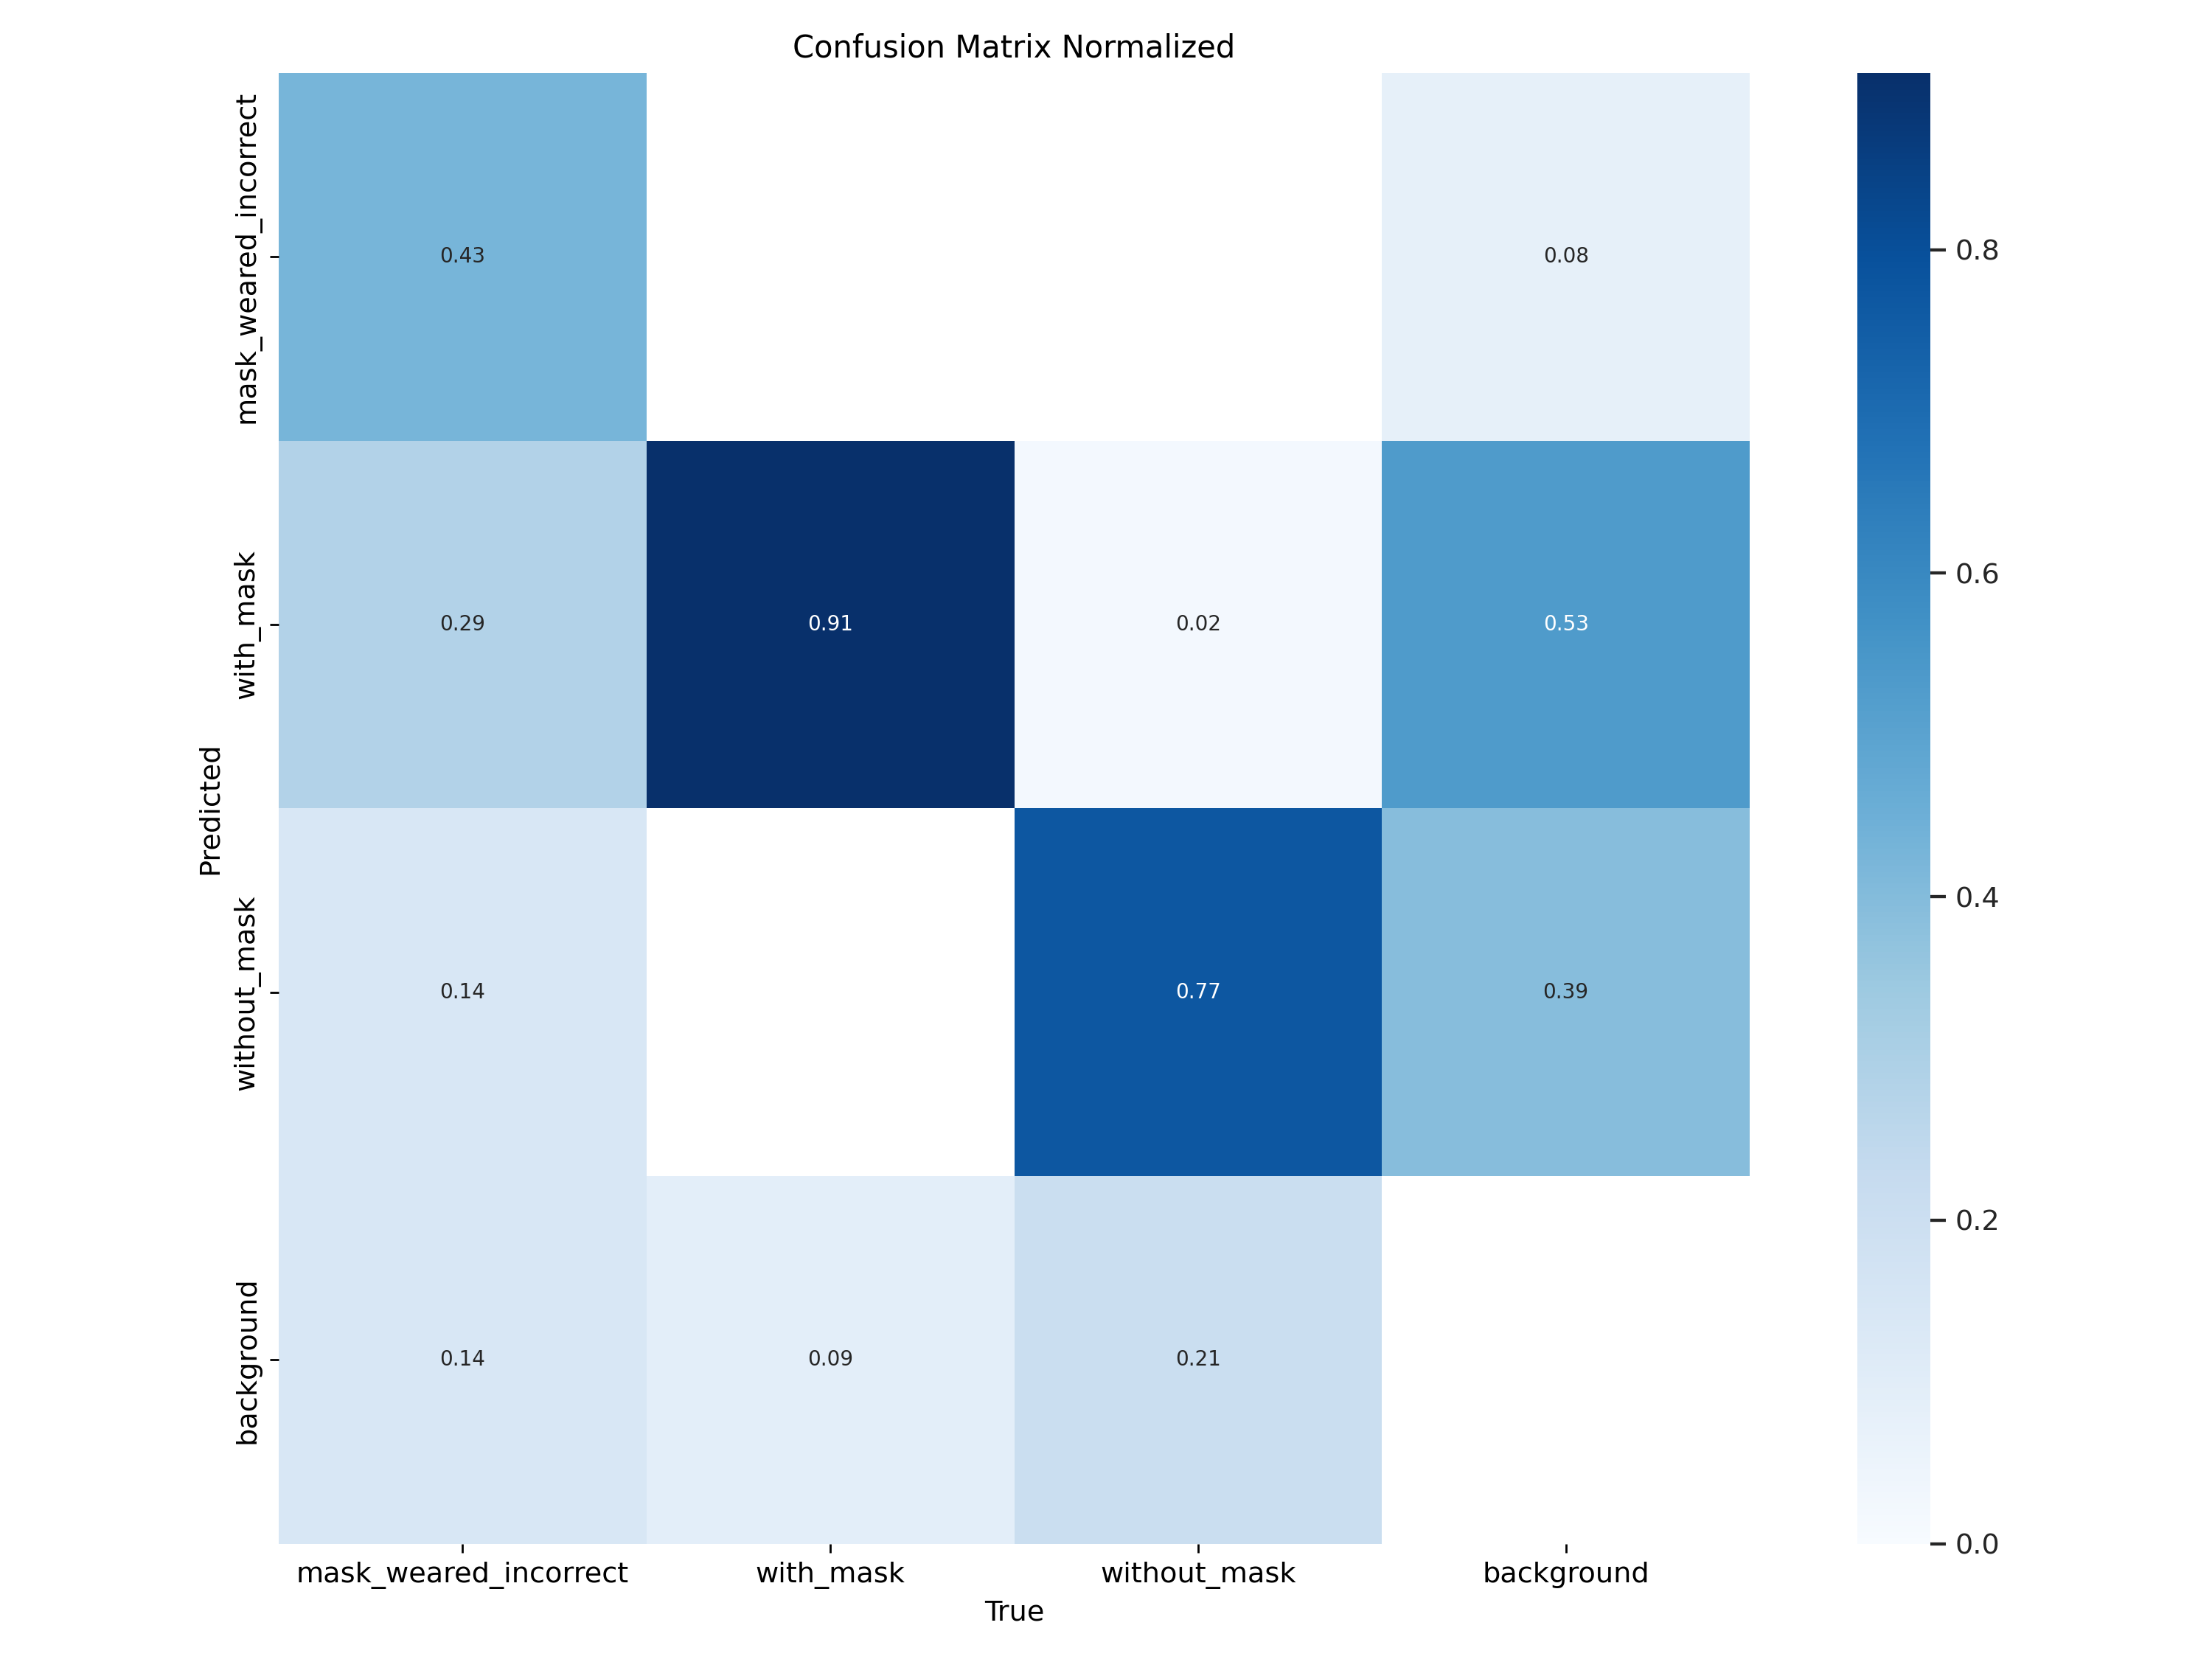

In [ ]:
Image(filename=f"{HOME}/runs/detect/train/confusion_matrix_normalized.png", width=900)

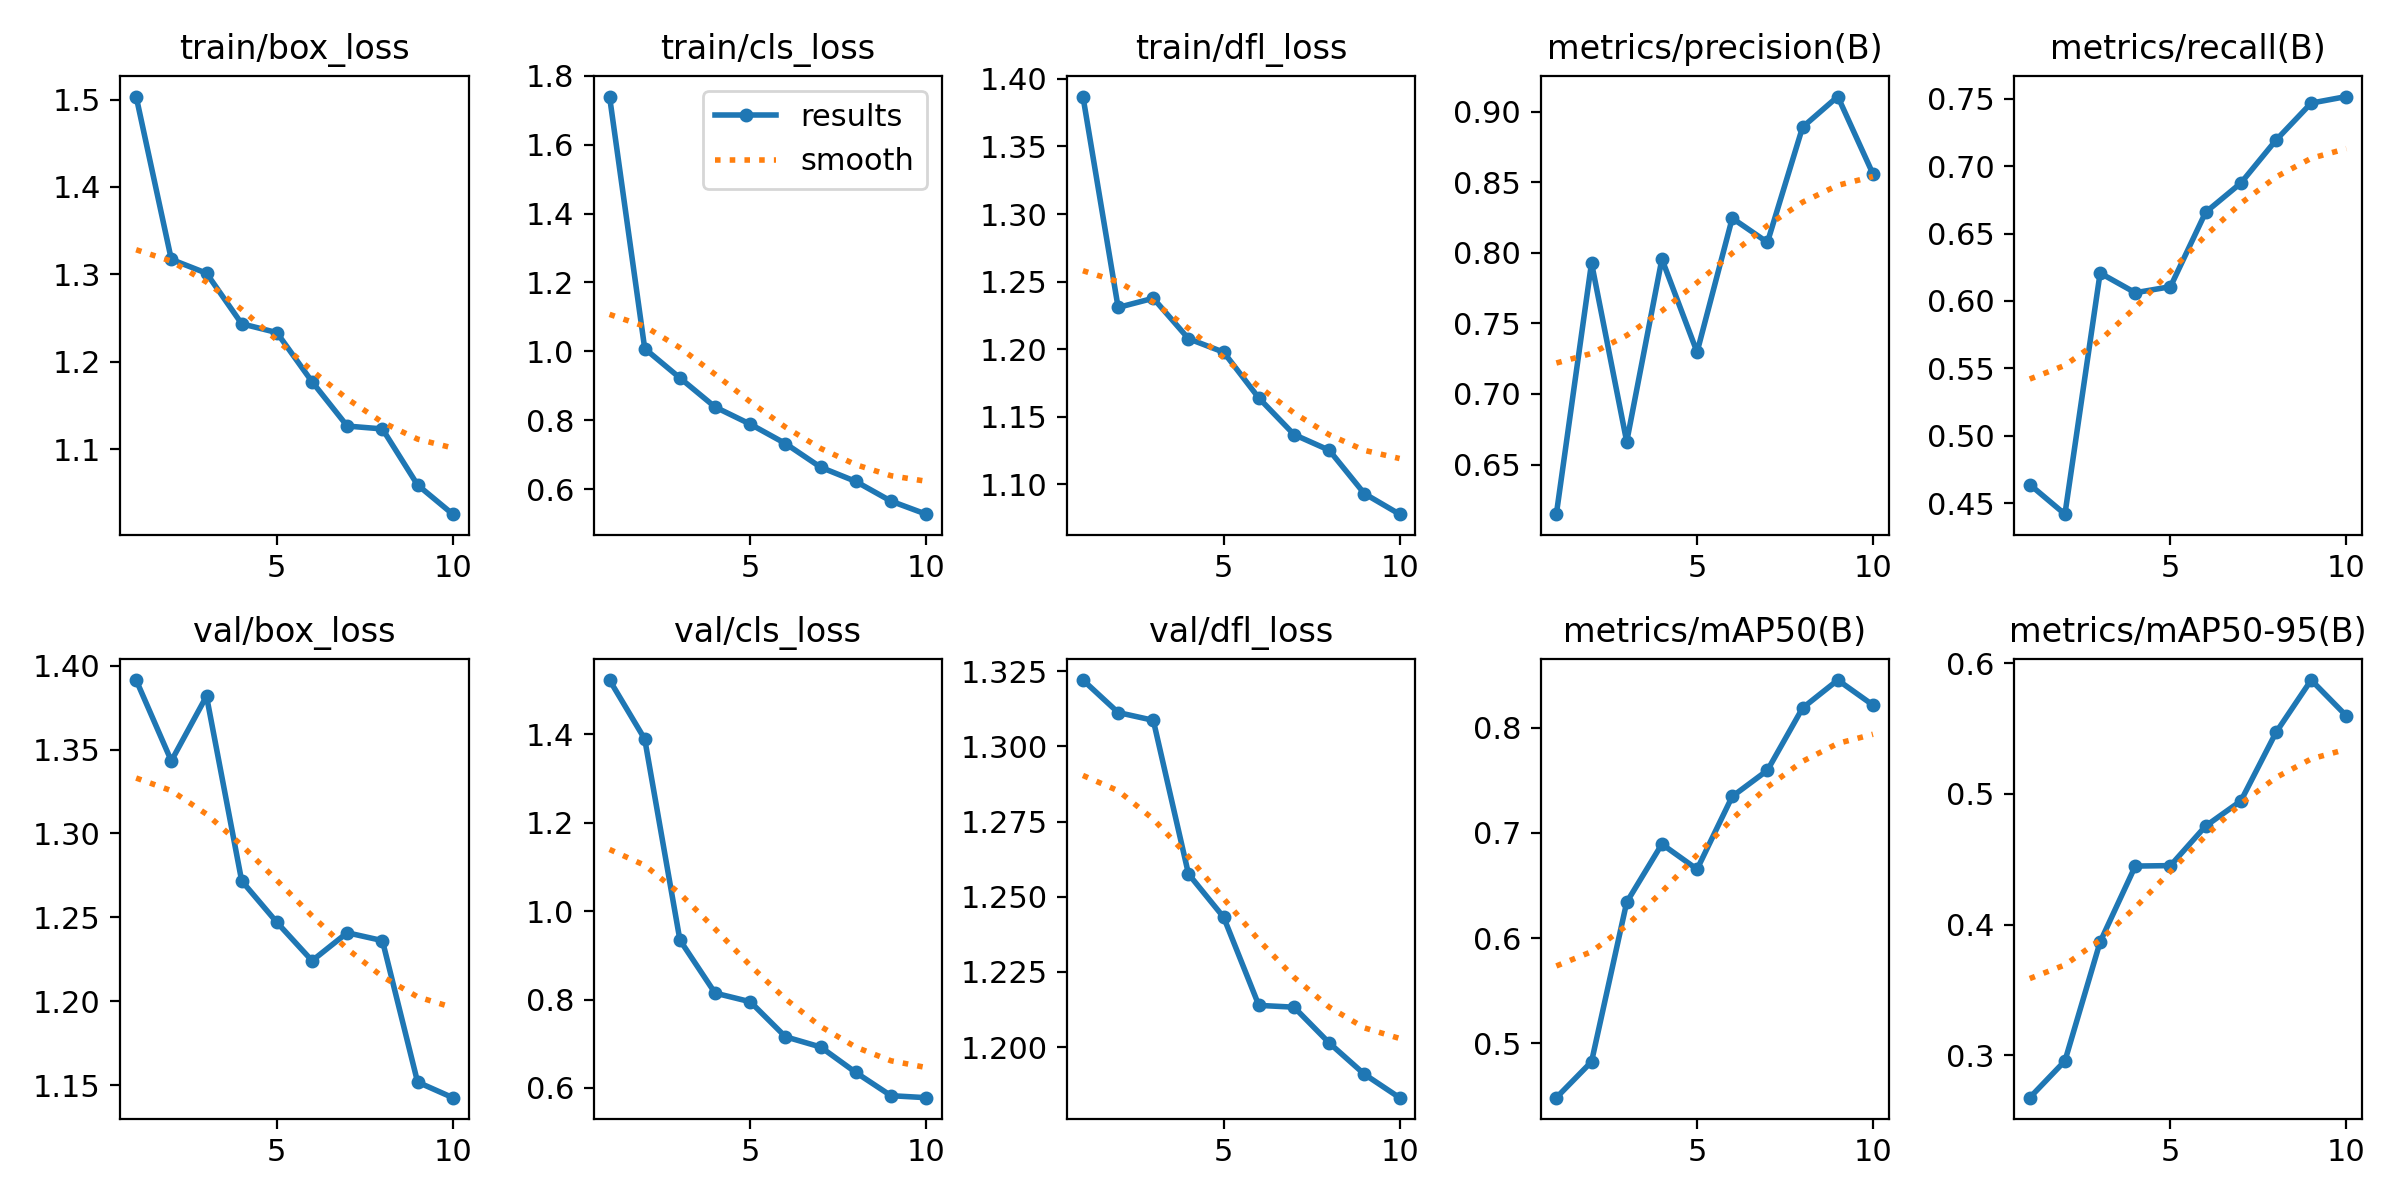

In [ ]:
Image(filename=f"{HOME}/runs/detect/train/results.png", width=900)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
import cv2

IMAGE_PATH = f"{HOME}/test/images/maksssksksss359_png.rf.b2940f2681e71a271ff122df1c9d2dda.jpg"

image = cv2.imread(IMAGE_PATH)

In [ ]:
# Perform object detection on an image using the model
results = model(IMAGE_PATH, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results)

In [ ]:
"detections", len(detections)

('detections', 19)

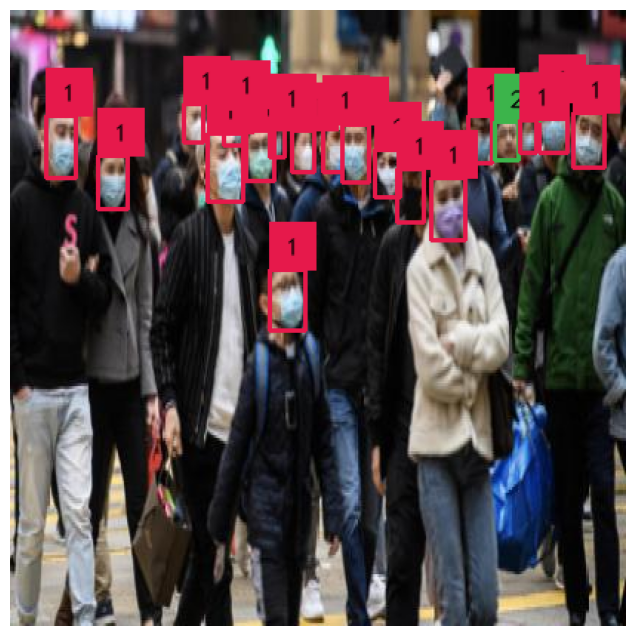

In [ ]:
box_annotator = sv.BoxAnnotator()

annotated_image = box_annotator.annotate(image.copy(), detections=detections)

sv.plot_image(image=annotated_image, size=(8, 8))

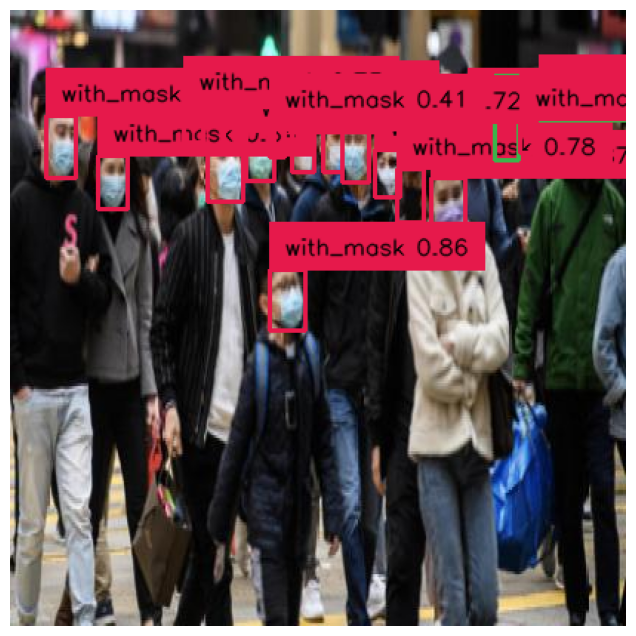

In [ ]:
box_annotator = sv.BoxAnnotator()

labels = [
    f"{model.model.names[class_id]} {confidence:.2f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]
annotated_image = box_annotator.annotate(image.copy(), detections=detections, labels=labels)

sv.plot_image(image=annotated_image, size=(8, 8))

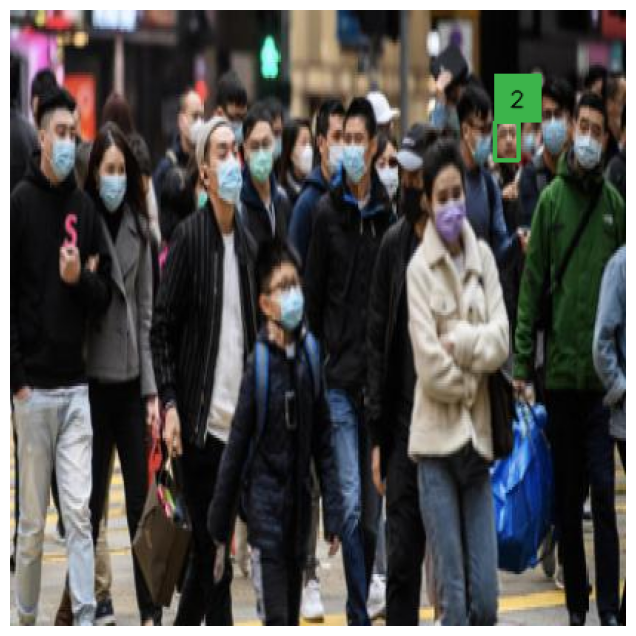

In [ ]:
detections_filtered = detections[detections.class_id == 2]
box_annotator = sv.BoxAnnotator()
annotated_image = box_annotator.annotate(image.copy(), detections=detections_filtered)
sv.plot_image(image=annotated_image, size=(8, 8))

In [ ]:
detections_filtered = detections_filtered[detections_filtered.confidence >= 0.70]

In [ ]:
detections_filtered

Detections(xyxy=array([[     327.77,      75.302,      343.19,      101.59]], dtype=float32), mask=None, confidence=array([    0.72827], dtype=float32), class_id=array([2]), tracker_id=None)

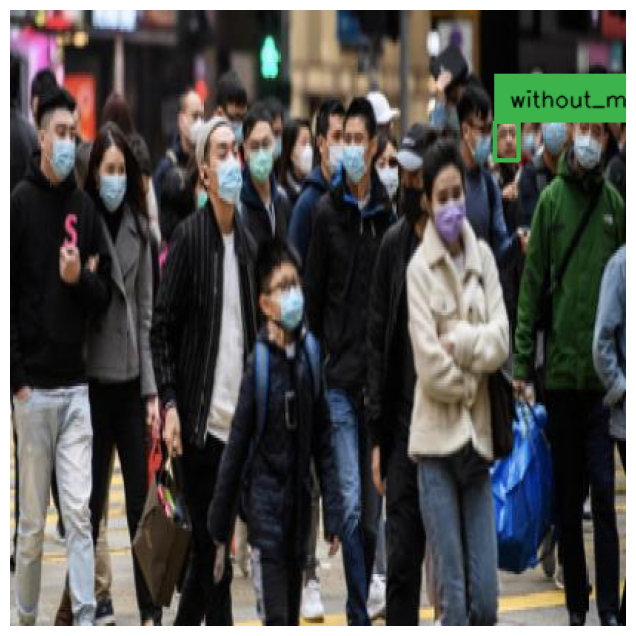

In [ ]:
box_annotator = sv.BoxAnnotator()

labels = [
    f"{model.model.names[class_id]} {confidence:.2f}"
    for class_id, confidence
    in zip(detections_filtered.class_id, detections_filtered.confidence)
]
annotated_image = box_annotator.annotate(image.copy(), detections=detections_filtered, labels=labels)

sv.plot_image(image=annotated_image, size=(8, 8))

In [ ]:
w, h, c = image.shape

In [ ]:
from ultralytics import YOLO
from ultralytics.solutions import heatmap
import cv2

heatmap_obj = heatmap.Heatmap()
heatmap_obj.set_args(colormap=cv2.COLORMAP_PARULA,
                     imw=w,
                     imh=h,
                     view_img=True,
                     shape="circle")

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()




0: 640x640 16 with_masks, 1 without_mask, 37.7ms
Speed: 3.6ms preprocess, 37.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


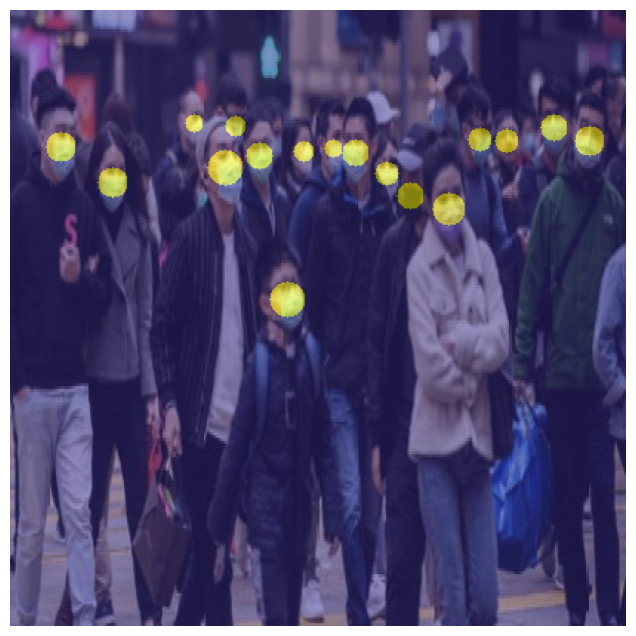

In [ ]:
tracks = model.track(image.copy(), persist=True, show=False)
im0 = heatmap_obj.generate_heatmap(image.copy(), tracks)
sv.plot_image(image=im0, size=(8, 8))


0: 640x640 1 without_mask, 41.2ms
Speed: 6.0ms preprocess, 41.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


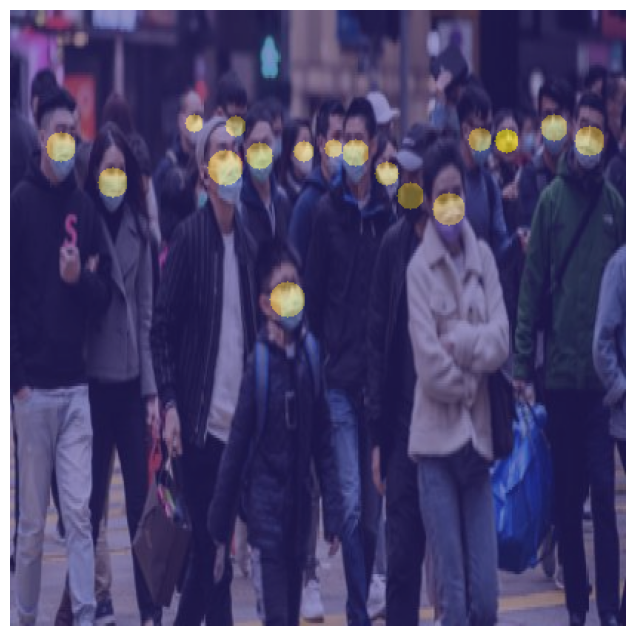

In [ ]:
classes_filtered = [2]
tracks = model.track(image.copy(), persist=True, show=False, classes=classes_filtered)
im0 = heatmap_obj.generate_heatmap(image.copy(), tracks)
sv.plot_image(image=im0, size=(8, 8))

In [ ]:
# Export the model to ONNX format
# https://docs.ultralytics.com/modes/export/#export-formats
success = model.export(format='onnx')

Ultralytics YOLOv8.1.4 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (49.6 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 25.5 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 8.7s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 14.0s, saved as 'runs/detect/train/weights/best.onnx' (98.8 MB)

Export complete (18.1s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train/weights/best.onnx imgsz=640 data=/content/data.yaml  
Visualize:       